# Notebook 8.1 - Multi-Objective Optimization

Management Science - Finding the Best Trade-offs

## Introduction

Welcome back to Bean Counter! As CEO, you’re facing a critical decision:
which new coffee product should we add to our menu in more than thousand
locations?

Unlike previous decisions where we optimized a single metric (like
minimizing delivery distance), today we’ll learn to balance **multiple
competing objectives** simultaneously. Specifically, we want to:

-   **Maximize profit margin** (more revenue per cup)
-   **Minimize preparation time** (faster service, more customers)

But there’s a problem: the most profitable drinks take longest to
prepare! This is called a **trade-off**, and it’s at the heart of
real-world decision-making.

> **How to Use This Tutorial**
>
> Work through each section in order. Write code where marked “YOUR CODE
> BELOW” and verify with the provided assertions. This prepares you for
> the competition challenge!

# Section 1: Visualizing the Trade-off

Let’s start by importing our libraries and loading the product data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict

# Set random seed for reproducibility
np.random.seed(2025)

## Product Data

Bean Counter’s R&D team has developed potential new products. Each has
been evaluated on multiple criteria:

In [2]:
# Product specifications
products = pd.DataFrame({
    'Product': ['Butterfly Lemonade', 'Ube Purple Latte', 'Tiger Nut Tea', 
                'Saffron Rose Milk', 'Moringa Mint Cooler', 'Black Sesame Frappé', 
                'Sakura Cherry Coffee', 'Blue Spirulina Smoothie', 'Charcoal Detox Shot', 
                'Pandan Coconut Cream', 'Lavender Honey Foam', 'Dragon Fruit Frappé',
                'Cascara Coffee Cherry', 'Nitro Matcha Float'],
    'Profit_Margin': [3.8, 4.1, 2.8, 4.3, 2.9, 3.5, 4.5, 3.2,
                      1.8, 3.6, 3.7, 4.8, 2.1, 3.4],  # € per unit
    'Prep_Time': [200, 240, 90, 270, 150, 210, 280, 180,
                  60, 220, 190, 300, 100, 140],  # seconds
    'Sustainability': [65, 40, 80, 55, 85, 62, 35, 60,
                       45, 68, 72, 50, 82, 78]  # score 0-100
})

print("Available Products:")
print(products.to_string(index=False))

Available Products:
                Product  Profit_Margin  Prep_Time  Sustainability
     Butterfly Lemonade            3.8        200              65
       Ube Purple Latte            4.1        240              40
          Tiger Nut Tea            2.8         90              80
      Saffron Rose Milk            4.3        270              55
    Moringa Mint Cooler            2.9        150              85
    Black Sesame Frappé            3.5        210              62
   Sakura Cherry Coffee            4.5        280              35
Blue Spirulina Smoothie            3.2        180              60
    Charcoal Detox Shot            1.8         60              45
   Pandan Coconut Cream            3.6        220              68
    Lavender Honey Foam            3.7        190              72
    Dragon Fruit Frappé            4.8        300              50
  Cascara Coffee Cherry            2.1        100              82
     Nitro Matcha Float            3.4        140       

> **The Core Trade-off**
>
> Notice the fundamental conflict:
>
> -   **Sakura Cherry Coffee**: Highest profit (€4.5) but slowest to
>     make (280s!)
> -   **Charcoal Detox Shot**: Fastest (60s = 1 minute) but lowest
>     profit (€1.8)
>
> We can’t have both maximum profit AND minimum prep time. We must
> choose a trade-off.

## Exercise 1.1: Visualize the Profit-Speed Trade-off

Create a scatter plot to see this trade-off visually.

> **Creating a Scatter Plot**
>
> ``` python
> plt.figure(figsize=(10, 6))          # Create figure
> plt.scatter(x, y, s=size, alpha=0.7) # Plot points
> plt.annotate(label, (x, y), ...)     # Label each point
> plt.xlabel('X Label')                # Axis labels
> plt.ylabel('Y Label')
> plt.grid(True, alpha=0.3)            # Add grid
> ```

> **Before You Start**
>
> -   X-axis: Profit Margin (want to maximize → move right)
> -   Y-axis: Prep Time (want to minimize → move down)
> -   **Best corner: Lower-right** (high profit, low time)
> -   Use a for-loop to annotate all products

In [3]:
# YOUR CODE BELOW
# Create a scatter plot: Profit (x) vs Prep Time (y)
# Annotate each point with the product name


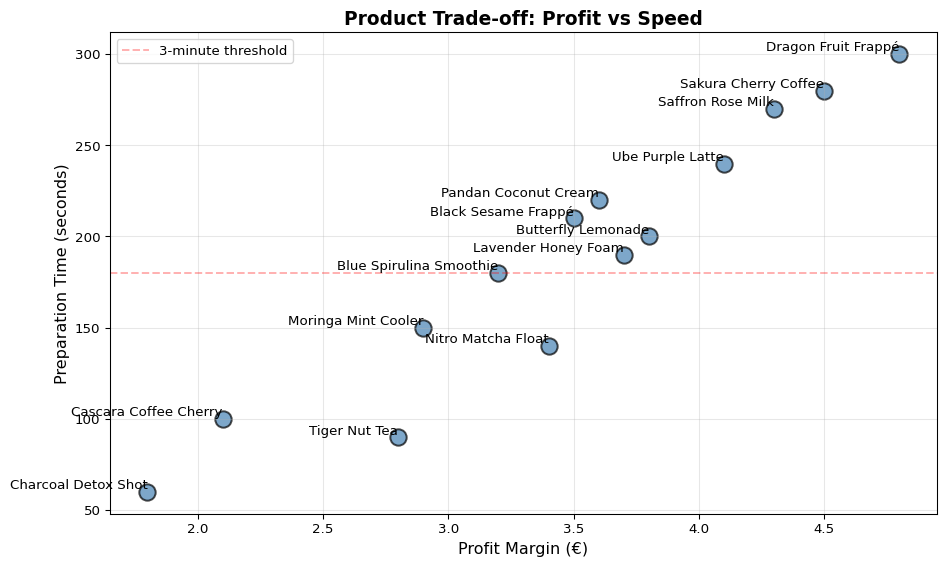

In [4]:
# Solution
plt.figure(figsize=(10, 6))

plt.scatter(products['Profit_Margin'], products['Prep_Time'], 
           s=150, alpha=0.7, color='steelblue', edgecolors='black', linewidth=1.5)

for i in range(len(products)):
    plt.annotate(products.iloc[i]['Product'], 
                (products.iloc[i]['Profit_Margin'], products.iloc[i]['Prep_Time']),
                fontsize=10, ha='right', va='bottom')

plt.xlabel('Profit Margin (€)', fontsize=12)
plt.ylabel('Preparation Time (seconds)', fontsize=12)
plt.title('Product Trade-off: Profit vs Speed', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.axhline(y=180, color='red', linestyle='--', alpha=0.3, label='3-minute threshold')
plt.legend()
plt.tight_layout()
plt.show()

# Section 2: Finding Non-Dominated Solutions

Not all products are worth considering. Some are **dominated**, so
strictly worse than another option.

> **What is Dominance?**
>
> Product A **dominates** product B if:
>
> 1.  A is **better or equal** on ALL objectives, AND
> 2.  A is **strictly better** on AT LEAST ONE objective
>
> **Example:** If Product X has higher profit AND lower prep time than
> Product Y, then X dominates Y.
>
> You should NEVER choose a dominated product as there’s always a better
> alternative!

## Exercise 2.1: Implement Dominance Check

Write a function to check if a product is dominated by any other
product.

> **Before You Start**
>
> -   Compare the current product with ALL other products
> -   For our objectives:
>     -   Profit: higher is better (maximize)
>     -   Prep Time: lower is better (minimize)
> -   Return `True` if ANY product dominates the current one

In [5]:
def is_dominated(product_idx: int, products_df: pd.DataFrame) -> bool:
    """
    Check if a product at product_idx is dominated by any other product.
    
    Returns True if dominated, False otherwise.
    """
    current = products_df.iloc[product_idx]
    
    # YOUR CODE BELOW
    # Loop through all products and check if any dominates current
    # Dominance: other has >= profit AND <= prep_time, with at least one strict < or >
    
    
    return False

In [6]:
# Solution
def is_dominated(product_idx: int, products_df: pd.DataFrame) -> bool:
    """Check if a product is dominated by any other product."""
    current = products_df.iloc[product_idx]
    
    for idx in range(len(products_df)):
        if idx == product_idx:
            continue
            
        other = products_df.iloc[idx]
        
        # Check dominance: other >= profit AND other <= prep_time
        if (other['Profit_Margin'] >= current['Profit_Margin'] and
            other['Prep_Time'] <= current['Prep_Time'] and
            (other['Profit_Margin'] > current['Profit_Margin'] or
             other['Prep_Time'] < current['Prep_Time'])):
            return True
    
    return False

In [7]:
# Test your function with the following
dominated = []
for i in range(len(products)):
    if is_dominated(i, products):
        dominated.append(products.iloc[i]['Product'])

print(f"Dominated products: {dominated}")

In [8]:
# Test your implementation
assert 'is_dominated' in dir(), "Define the is_dominated function"
assert len(dominated) >= 2, "Should find two dominated products"
assert 'Chai Tea' in dominated, "Chai Tea should be dominated (lower profit, slower than alternatives)"
print(f"Excellent! Found {len(dominated)} dominated products")
print("These should NEVER be chosen - better alternatives exist!")

## Exercise 2.2: Find the Pareto Frontier

The **Pareto frontier** contains all non-dominated solutions - the only
rational choices.

> **What is the Pareto Frontier?**
>
> The Pareto frontier (or Pareto set) is the set of ALL non-dominated
> solutions.
>
> **Why it matters:** These are the ONLY products worth considering.
> Every point on the frontier represents a different trade-off, and none
> is strictly better than the others.
>
> In the competition, you’ll use this exact concept to find optimal
> fleet compositions!

> **Before You Start**
>
> -   Create a boolean array `is_pareto` (all True initially)
> -   For each product i, check if ANY product j dominates it
> -   If dominated, set `is_pareto[i] = False`
> -   Return only products where `is_pareto` is True

In [9]:
def find_pareto_frontier(products_df: pd.DataFrame) -> pd.DataFrame:
    """
    Find all non-dominated products (Pareto frontier).
    
    Returns DataFrame with only Pareto optimal products.
    """
    n = len(products_df)
    is_pareto = np.ones(n, dtype=bool)
    
    # YOUR CODE BELOW
    # For each product i, check if any product j dominates it
    
    
    return products_df[is_pareto]

In [10]:
# Solution
def find_pareto_frontier(products_df: pd.DataFrame) -> pd.DataFrame:
    """Find all non-dominated products."""
    n = len(products_df)
    is_pareto = np.ones(n, dtype=bool)
    
    for i in range(n):
        if not is_pareto[i]:  # Already marked as dominated
            continue
            
        for j in range(n):
            if i == j:
                continue
                
            # Check if j dominates i
            if (products_df.iloc[j]['Profit_Margin'] >= products_df.iloc[i]['Profit_Margin'] and
                products_df.iloc[j]['Prep_Time'] <= products_df.iloc[i]['Prep_Time'] and
                (products_df.iloc[j]['Profit_Margin'] > products_df.iloc[i]['Profit_Margin'] or
                 products_df.iloc[j]['Prep_Time'] < products_df.iloc[i]['Prep_Time'])):
                is_pareto[i] = False
                break
    
    return products_df[is_pareto]

In [11]:
# Find and display Pareto frontier based on your function
pareto_products = find_pareto_frontier(products)
print(f"\nPareto Frontier ({len(pareto_products)} products):")
print(pareto_products[['Product', 'Profit_Margin', 'Prep_Time']].to_string(index=False))

In [12]:
# Test your Pareto frontier function
assert 'find_pareto_frontier' in dir(), "Define find_pareto_frontier function"
assert len(pareto_products) >= 3, "Should find at least 3 Pareto optimal products"
assert 'Classic Espresso' in pareto_products['Product'].values, "Classic Espresso (fastest) should be on frontier"
assert 'Energy Smoothie' in pareto_products['Product'].values, "Energy Smoothie (highest profit) should be on frontier"
print("Perfect! These are the ONLY products worth considering")

## Visualizing the Pareto Frontier

Let’s plot the Pareto frontier to see it clearly:

In [13]:
# Visualize Pareto frontier
plt.figure(figsize=(10, 6))

# Plot all products
plt.scatter(products['Profit_Margin'], products['Prep_Time'], 
            alpha=0.3, color='gray', label='Dominated')

# Highlight Pareto frontier
pareto_idx = pareto_products.index
plt.scatter(products.loc[pareto_idx, 'Profit_Margin'], 
           products.loc[pareto_idx, 'Prep_Time'],
           alpha=0.5, color='red', 
           label='Pareto Frontier', zorder=5)

# Annotate Pareto products
for idx in pareto_idx:
    plt.annotate(products.loc[idx, 'Product'],
                (products.loc[idx, 'Profit_Margin'], products.loc[idx, 'Prep_Time']),
                fontsize=10, va='bottom')

plt.xlabel('Profit Margin (€)', fontsize=12)
plt.ylabel('Preparation Time (seconds)', fontsize=12)
plt.title('Pareto Frontier: Non-Dominated Products', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

> **Interpreting the Pareto Frontier**
>
> Each point on the frontier represents a different trade-off:
>
> -   **Classic Espresso** (left): Fastest prep, lowest profit → “Speed
>     Strategy”
> -   **Energy Smoothie** (right): Highest profit, slowest prep →
>     “Profit Strategy”
> -   **Middle products**: Balanced compromises
>
> **None dominates the others** - your choice depends on your
> priorities!

# Section 3: Making the Decision with Weighted Sums

How do we choose ONE product from the Pareto frontier? We use
**weights** to express our priorities.

> **Why Normalization is Critical**
>
> Before combining objectives, we MUST normalize them:
>
> -   Profit range: 1.8 to 4.5 (range = 2.7)
> -   Prep Time range: 60 to 270 (range = 210)
>
> Without normalization, prep time dominates because 210 \>\> 2.7, even
> with equal weights!

## Exercise 3.1: Normalize Objectives

Normalize both objectives to \[0, 1\] scale.

> **What is a pandas Series?**
>
> A **pandas Series** is like a single column from a DataFrame:
>
> ``` python
> products['Profit_Margin']  # This is a Series (one column)
> ```
>
> -   Has built-in methods: `.min()`, `.max()`, `.mean()`
> -   Supports arithmetic: `series - 5`, `series * 2`
> -   Returns a new Series when you do math on it

> **Min-Max Normalization Formula**
>
>     normalized_value = (value - min_value) / (max_value - min_value)
>
> -   Minimum value → 0
> -   Maximum value → 1
> -   Preserves relative distances

In [14]:
def normalize_column(series: pd.Series) -> pd.Series:
    """Normalize a pandas Series to [0, 1] range."""
    # YOUR CODE BELOW
    # Hint: series.min() and series.max() give you the min/max values


In [15]:
# Solution
def normalize_column(series: pd.Series) -> pd.Series:
    """Normalize a pandas Series to [0, 1] range."""
    min_val = series.min()
    max_val = series.max()
    
    if max_val > min_val:
        return (series - min_val) / (max_val - min_val)
    else:
        return pd.Series([0.5] * len(series), index=series.index)

In [16]:
# Normalize objectives with your new normalize_column function
products_norm = products.copy()
products_norm['Profit_Norm'] = normalize_column(products['Profit_Margin'])
products_norm['Prep_Norm'] = normalize_column(products['Prep_Time'])
print("Normalized values:")
print(products_norm[['Product', 'Profit_Norm', 'Prep_Norm']].to_string(index=False))

In [17]:
# Test normalization
assert 'normalize_column' in dir(), "Define normalize_column function"
assert products_norm['Profit_Norm'].min() >= 0, "Min should be >= 0"
assert products_norm['Profit_Norm'].max() <= 1, "Max should be <= 1"
assert abs(products_norm['Profit_Norm'].max() - 1.0) < 0.01, "Max should be exactly 1.0"
print("Perfect! Objectives are now on the same scale [0, 1]")

## Exercise 3.2: Calculate Weighted Score

Now combine the normalized objectives using weights.

> **Weighted Sum Method**
>
>     Score = w_profit × profit + w_speed × speed
>
> Where weights sum to 1.0 (representing 100% of priorities).

> **Warning**
>
> We want to **MINIMIZE** prep time, so use `(1 - prep_norm)` to flip it
> in the weighted score!

In [18]:
def calculate_score(profit_norm, prep_norm, w_profit, w_speed):
    """Calculate weighted score. Higher is better."""
    # YOUR CODE BELOW
    # Remember: minimize prep time means use (1 - prep_norm)


In [19]:
# Solution
def calculate_score(profit_norm, prep_norm, w_profit, w_speed):
    """Calculate weighted score. Higher is better."""
    return w_profit * profit_norm + w_speed * (1 - prep_norm)

In [20]:
# Test different weight scenarios with your new function
scenarios = {
    'Profit Focus': {'w_profit': 0.7, 'w_speed': 0.3},
    'Balanced': {'w_profit': 0.5, 'w_speed': 0.5},
    'Speed Focus': {'w_profit': 0.3, 'w_speed': 0.7}
}

results = []
for name, weights in scenarios.items():
    products_norm['Score'] = calculate_score(
        products_norm['Profit_Norm'], 
        products_norm['Prep_Norm'],
        weights['w_profit'], 
        weights['w_speed']
    )
    best_idx = products_norm['Score'].idxmax()
    results.append({
        'Scenario': name,
        'Best Product': products.loc[best_idx, 'Product'],
        'Score': products_norm.loc[best_idx, 'Score']
    })

results_df = pd.DataFrame(results)
print("\nBest product for each scenario:")
print(results_df.to_string(index=False))

In [21]:
# Test weighted scoring
assert 'calculate_score' in dir(), "Define calculate_score function"
assert len(results_df) == 3, "Should have 3 scenarios"
assert all(results_df['Score'] > 0), "All scores should be positive"
assert all(results_df['Score'] <= 1), "All scores should be <= 1"
print("Excellent! Different weights lead to different optimal products")

# Section 4: Hard Constraints

In reality, we often have **hard constraints**, requirements that MUST
be met.

> **Constraints vs Objectives**
>
> -   **Objective**: Something to optimize (minimize/maximize)
> -   **Constraint**: A requirement that must be satisfied
>
> Example: Bean Counter wants sustainability ≥ 60

## Exercise 4.1: Filter by Sustainability Constraint

Filter products to only those meeting the sustainability requirement.

In [22]:
# YOUR CODE BELOW
# Filter products where Sustainability >= 60
sustainability_threshold = 60
feasible_products = # YOUR CODE HERE

print(f"\nFeasible products (sustainability >= {sustainability_threshold}):")
print(feasible_products[['Product', 'Profit_Margin', 'Prep_Time', 'Sustainability']].to_string(index=False))

In [23]:
# Solution
sustainability_threshold = 60
feasible_products = products[products['Sustainability'] >= sustainability_threshold]

print(f"\nFeasible products (sustainability >= {sustainability_threshold}):")
print(feasible_products[['Product', 'Profit_Margin', 'Prep_Time', 'Sustainability']].to_string(index=False))


Feasible products (sustainability >= 60):
                Product  Profit_Margin  Prep_Time  Sustainability
     Butterfly Lemonade            3.8        200              65
          Tiger Nut Tea            2.8         90              80
    Moringa Mint Cooler            2.9        150              85
    Black Sesame Frappé            3.5        210              62
Blue Spirulina Smoothie            3.2        180              60
   Pandan Coconut Cream            3.6        220              68
    Lavender Honey Foam            3.7        190              72
  Cascara Coffee Cherry            2.1        100              82
     Nitro Matcha Float            3.4        140              78

In [24]:
# Test constraint filtering
assert 'feasible_products' in dir(), "Create feasible_products variable"
assert len(feasible_products) > 0, "Should have at least one feasible product"
assert all(feasible_products['Sustainability'] >= 60), "All products should meet constraint"
print(f"✓ Great! {len(feasible_products)} products meet the sustainability requirement")

## Exercise 4.2: Pareto Frontier with Constraints

Find the Pareto frontier AMONG only the feasible products.

In [25]:
# YOUR CODE BELOW
# Apply find_pareto_frontier to feasible_products only
constrained_pareto = # YOUR CODE HERE

print(f"\nConstrained Pareto Frontier ({len(constrained_pareto)} products):")
print(constrained_pareto[['Product', 'Profit_Margin', 'Prep_Time', 'Sustainability']].to_string(index=False))

In [26]:
# Solution
constrained_pareto = find_pareto_frontier(feasible_products)

print(f"\nConstrained Pareto Frontier ({len(constrained_pareto)} products):")
print(constrained_pareto[['Product', 'Profit_Margin', 'Prep_Time', 'Sustainability']].to_string(index=False))

In [27]:
# Test constrained Pareto frontier
assert 'constrained_pareto' in dir(), "Create constrained_pareto variable"
assert len(constrained_pareto) <= len(feasible_products), "Pareto set should be <= feasible set"
assert all(constrained_pareto['Sustainability'] >= 60), "All should meet constraint"
print("Perfect! This is your constrained Pareto frontier")
print("These are the ONLY rational choices given the sustainability requirement")

## Visualizing Constraints and Pareto Frontier

In [28]:
# Visualize feasible region and Pareto frontier
plt.figure(figsize=(10, 6))

# Plot infeasible products
infeasible = products[products['Sustainability'] < 60]
if len(infeasible) > 0:
    plt.scatter(infeasible['Profit_Margin'], infeasible['Prep_Time'],
               alpha=0.3, color='red', marker='x', label='Infeasible')

# Plot feasible but dominated
feasible_dominated = feasible_products[~feasible_products.index.isin(constrained_pareto.index)]
if len(feasible_dominated) > 0:
    plt.scatter(feasible_dominated['Profit_Margin'], feasible_dominated['Prep_Time'],
               alpha=0.4, color='gray', label='Feasible (dominated)')

# Plot constrained Pareto frontier
plt.scatter(constrained_pareto['Profit_Margin'], constrained_pareto['Prep_Time'],
        alpha=0.9, color='green',
           label='Constrained Pareto Frontier', zorder=5)

for idx in constrained_pareto.index:
    plt.annotate(products.loc[idx, 'Product'],
                (products.loc[idx, 'Profit_Margin'], products.loc[idx, 'Prep_Time']),
                fontsize=10, va='bottom')

plt.xlabel('Profit Margin (€)', fontsize=12)
plt.ylabel('Preparation Time (seconds)', fontsize=12)
plt.title('Constrained Pareto Frontier (Sustainability ≥ 60)', fontsize=14, fontweight='bold')
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## Exercise 4.3: Choose the Best Product with Weighted Scoring

Now that we have the constrained Pareto frontier, let’s use weighted
scoring to select the final product.

> **Before You Start**
>
> -   Normalize the constrained Pareto products (not all products!)
> -   Apply your `calculate_score` function
> -   Find the product with the highest score
> -   Use weights: 60% profit, 40% speed (w_profit=0.6, w_speed=0.4)

In [29]:
# YOUR CODE BELOW
# 1. Normalize the constrained Pareto products
constrained_norm = constrained_pareto.copy()
constrained_norm['Profit_Norm'] = # YOUR CODE HERE
constrained_norm['Prep_Norm'] = # YOUR CODE HERE

# 2. Calculate weighted scores (60% profit, 40% speed)
constrained_norm['Score'] = # YOUR CODE HERE

# 3. Find the best product
best_idx = # YOUR CODE HERE
best_product = products.loc[best_idx]

print(f"\nRECOMMENDED PRODUCT: {best_product['Product']}")
print(f"  Profit Margin: €{best_product['Profit_Margin']:.2f}")
print(f"  Prep Time: {best_product['Prep_Time']:.0f}s")
print(f"  Sustainability: {best_product['Sustainability']:.0f}")
print(f"  Weighted Score: {constrained_norm.loc[best_idx, 'Score']:.3f}")

In [30]:
# Solution
# 1. Normalize the constrained Pareto products
constrained_norm = constrained_pareto.copy()
constrained_norm['Profit_Norm'] = normalize_column(constrained_pareto['Profit_Margin'])
constrained_norm['Prep_Norm'] = normalize_column(constrained_pareto['Prep_Time'])

# 2. Calculate weighted scores (60% profit, 40% speed)
constrained_norm['Score'] = calculate_score(
    constrained_norm['Profit_Norm'],
    constrained_norm['Prep_Norm'],
    w_profit=0.6,
    w_speed=0.4
)

# 3. Find the best product
best_idx = constrained_norm['Score'].idxmax()
best_product = products.loc[best_idx]

print(f"\nRECOMMENDED PRODUCT: {best_product['Product']}")
print(f"  Profit Margin: €{best_product['Profit_Margin']:.2f}")
print(f"  Prep Time: {best_product['Prep_Time']:.0f}s")
print(f"  Sustainability: {best_product['Sustainability']:.0f}")
print(f"  Weighted Score: {constrained_norm.loc[best_idx, 'Score']:.3f}")

In [31]:
# Test your final selection
assert 'constrained_norm' in dir(), "Create constrained_norm DataFrame"
assert 'Score' in constrained_norm.columns, "Calculate Score column"
assert 'best_idx' in dir(), "Find best_idx"
assert best_product['Sustainability'] >= 60, "Best product must meet constraint"
print("Excellent! You've completed the full optimization workflow!")

# Conclusion

Congratulations! You’ve mastered multi-objective optimization with
constraints!

## Key Takeaways

-   **Trade-offs are inevitable** when optimizing multiple objectives
-   **Dominated solutions** should never be chosen
-   **Pareto frontier** contains all rational choices
-   **Normalization** is critical before combining objectives
-   **Weighted sums** let you express priorities
-   **Hard constraints** limit the feasible region
-   **Constrained Pareto frontier** = intersection of Pareto set and
    feasible region

## What’s Next?

In the competition, you’ll apply these concepts to design EcoExpress’s
sustainable delivery fleet:

-   **2 objectives**: Minimize total cost, Maximize service score
-   **1 constraint**: CO2 emissions ≤ 111 g/km
-   **Your task**: Generate fleet alternatives, find Pareto frontier,
    recommend the best one
-   **Deliverable**: One-slide visualization showing your analysis

Good luck!